<a href="https://colab.research.google.com/github/AilalOmar/AilalOmar/blob/main/Quality_Control_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quality Control Project


**1 . Calling Dataset**

*Uploding CSV File*



In [4]:
from google.colab import files
uploaded = files.upload()


Saving uci-secom.csv to uci-secom.csv


*Importing libraries*

In [49]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


*Put csv file as variable*

In [3]:
df = pd.read_csv("uci-secom.csv")
df.head(10)

NameError: name 'pd' is not defined

**2 . Data Preprocessing**

*Number of NAN and Zeros for each columns*

In [46]:
# NAN and "0 " values number for each columns
for col in df.columns:
    null_count = df[col].isnull().sum(); zero_count = (df[col] == 0).sum()
    print(f"{col} → {null_count} missing values", f"→ {zero_count} zero values")


Time → 0 missing values → 0 zero values
0 → 6 missing values → 0 zero values
1 → 7 missing values → 0 zero values
2 → 14 missing values → 0 zero values
3 → 14 missing values → 1 zero values
4 → 14 missing values → 0 zero values
5 → 14 missing values → 0 zero values
6 → 14 missing values → 0 zero values
7 → 9 missing values → 8 zero values
8 → 2 missing values → 0 zero values
9 → 2 missing values → 5 zero values
10 → 2 missing values → 7 zero values
11 → 2 missing values → 0 zero values
12 → 2 missing values → 0 zero values
13 → 3 missing values → 1564 zero values
14 → 3 missing values → 0 zero values
15 → 3 missing values → 0 zero values
16 → 3 missing values → 0 zero values
17 → 3 missing values → 0 zero values
18 → 3 missing values → 0 zero values
19 → 10 missing values → 0 zero values
20 → 0 missing values → 0 zero values
21 → 2 missing values → 1 zero values
22 → 2 missing values → 1 zero values
23 → 2 missing values → 1 zero values
24 → 2 missing values → 1 zero values
25 → 2 miss

In [2]:
df.info
df.describe()
df.dtypes
df = df.drop(columns=['Time'])
# from object type to date
df['Time'] = pd.to_datetime(df['Time'])
df.dtypes

## Remove columns with more 100 Nan values
# Columns with NaN > 100
cols_to_drop_nan = df.columns[df.isnull().sum() > 100]

# Columns with 0 > 100
cols_to_drop_zero = df.columns[(df == 0).sum() > 100]

# Combine both
cols_to_drop = cols_to_drop_nan.union(cols_to_drop_zero)

print("Columns removed:")
print(cols_to_drop)

# Drop them
df = df.drop(columns=cols_to_drop)

# less columns with NAN , 0 value
for col in df.columns:
    null_count = df[col].isnull().sum(); zero_count = (df[col] == 0).sum()
    #print(f"{col} → {null_count} missing values", f" → {zero_count} zero values")

# replace NAN and 0 with median of columns

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    df[col] = df[col].replace(0, np.nan)  # Step 1: treat 0 as missing
    median_value = df[col].median()      # Step 2: compute median without zeros
    df[col] = df[col].fillna(median_value)

for col in df.columns:
    null_count = df[col].isnull().sum(); zero_count = (df[col] == 0).sum()
    print(f"{col} → {null_count} missing values", f" → {zero_count} zero values")




NameError: name 'df' is not defined

*Check Imbalance*

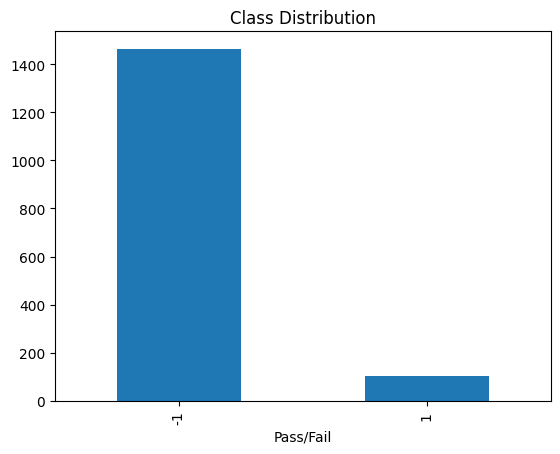

In [52]:
df['Pass/Fail'].value_counts()
# there is imbalance in the columns to predict

df['Pass/Fail'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()


*Correleation Matrix*

In [53]:
corr_matrix = df.corr()
corr_matrix
plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Gravure'